# Analysis of poetry

This notebook explains how you can analyse poetic language, using the Python package `poetry_analysis`.  It needs to be installed first.

In [1]:
# !pip install reading_poetry
# !pip install vaderSentiment
# !pip install pyvis

In [2]:
import reading_poetry as rp
import os
import re

In [3]:
url = 'https://github.com/peterverhaar/reading_poetry_notebooks/raw/main/Poems.zip'

import requests

response = requests.get(url)
if response:
    open("Poems.zip", "wb").write(response.content)

from zipfile import ZipFile

with ZipFile('Poems.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

As a first step, it is necessary to make transcriptions. 

    THE LAKE ISLE OF INNISFREE

    I WILL arise and go now, and go to Innisfree,
    And a small cabin build there, of clay and wattles made:
    Nine bean-rows will I have there, a hive for the honeybee,
    And live alone in the bee-loud glade.
    And I shall have some peace there, for peace comes dropping slow,
    Dropping from the veils of the mourning to where the cricket sings;
    There midnight's all a glimmer, and noon a purple glow,
    And evening full of the linnet's wings.
    I will arise and go now, for always night and day
    I hear lake water lapping with low sounds by the shore;
    While I stand on the roadway, or on the pavements grey,
    I hear it in the deep heart's core.



    Snow

    The room was suddenly rich and the great bay-window was
    Spawning snow and pink roses against it
    Soundlessly collateral and incompatible:
    World is suddener than we fancy it.

    World is crazier and more of it than we think,
    Incorrigibly plural. I peel and portion
    A tangerine and spit the pips and feel
    The drunkenness of things being various.

    And the fire flames with a bubbling sound for world
    Is more spiteful and gay than one supposes— 
    On the tongue on the eyes on the ears in the palms of one's hands—
    There is more than glass between the snow and the huge roses.


## Phonetic transcription

In [4]:
verse_line = "The drunkenness of things being various"

print( rp.transcribe(verse_line) )

D@ !drVN-k@n-n@s Qv !TINz !bi:-IN !ve@-rI-@s


## Add annotations in TEI

In [5]:
path = os.path.join('Poems','Yeats','TheLakeIsleOfInnisfree.txt' )
xml = rp.add_annotations(path)
print(xml)

Adding annotations for Poems/Yeats/TheLakeIsleOfInnisfree.txt ... 
<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="../tei_lite.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0">
  <teiHeader>
      <fileDesc>
         <titleStmt>
            <title>The Lake Isle Of Innisfree</title>
         </titleStmt>
         <publicationStmt>
            <p>Publication Information; to be added</p>
         </publicationStmt>
         <sourceDesc>
            <p>The Lake Isle Of Innisfree</p>
         </sourceDesc>
      </fileDesc>
  </teiHeader><text>
      <body><head><title>The Lake Isle Of Innisfree</title></head>
<lg n="s1">
<l n="1">
<w pos="PRP" lemma="i" phon="!aI" >I</w> 
<w pos="MD" lemma="will" phon="!wIl" >will</w> 
<w pos="VB" lemma="arise" phon="@-!raIz" >arise</w> 
<w pos="CC" lemma="and" phon="@n" >and</w> 
<w pos="VB" lemma="go" phon="!g@U" >go</w> 
<w pos="NN" lemma="now" phon="!naU" >now,</w> 
<w po

Encode all poems in folder

In [6]:
if not os.path.isdir('XML'):
    os.mkdir('XML')
    
dir = 'Poems'

author = dict()
texts = []

for root, dirs, files in os.walk(dir):
    for file in files:
        if re.search( r'\.txt$' , file ):
            texts.append( os.path.join(root, file) )

for t in sorted(texts):

    out_file = os.path.basename(t)
    out_file = re.sub( 'txt$' , 'xml' , out_file )
    out_file = out_file
    
    if re.search( 'Yeats' , t , re.IGNORECASE ):
        author[out_file] = 'Yeats'
    else:
        author[out_file] = 'MacNeice'
        
    out = open( os.path.join( 'XML' , out_file ) , 'w' , encoding='utf-8' ,    errors= 'replace')
    
    tei = rp.add_annotations(t)
    out.write(tei)
    out.close()
    
print('Done!')
    

Adding annotations for Poems/MacNeice/Autobiography.txt ... 
Adding annotations for Poems/MacNeice/BagpipeMusic.txt ... 
Adding annotations for Poems/MacNeice/Belfast.txt ... 
Adding annotations for Poems/MacNeice/Birmingham.txt ... 
Adding annotations for Poems/MacNeice/Budgie.txt ... 
Adding annotations for Poems/MacNeice/FlightOfTheHeart.txt ... 
Adding annotations for Poems/MacNeice/Invocation.txt ... 
Adding annotations for Poems/MacNeice/SelvaOscura.txt ... 
Adding annotations for Poems/MacNeice/Snow.txt ... 
Adding annotations for Poems/MacNeice/SundayMorning.txt ... 
Adding annotations for Poems/MacNeice/TheClosingAlbum.txt ... 
Adding annotations for Poems/MacNeice/ThePalePanther.txt ... 
Adding annotations for Poems/MacNeice/TheSunlightOnTheGarden.txt ... 
Adding annotations for Poems/MacNeice/TrainToDublin.txt ... 
Adding annotations for Poems/MacNeice/Vistas.txt ... 
Adding annotations for Poems/MacNeice/WesternLandscape.txt ... 
Adding annotations for Poems/Yeats/ACoat.txt

## Basic information about poems

In [7]:
dir = 'XML'
file = 'TheLakeIsleOfInnisfree.xml'
path = os.path.join( dir, file )

poem = rp.Poem( path )


print( f'Number of lines: {poem.nr_lines} ' )
print( f'Number of words: {poem.nr_words} ' )
print( f'Number of stanzas: {poem.nr_stanzas} ' )

Number of lines: 12 
Number of words: 121 
Number of stanzas: 3 


In [8]:
print( poem.title + '\n')

stanzas = poem.stanza_structure
print(stanzas)
print('\n', end = '')

last_lines = []
for s in stanzas:
    last_lines.append(stanzas[s][-1])
    
lines = poem.lines
for n in lines:    
    print( f'{n}. {lines[n]}' )
    if n in last_lines:
        print('\n', end = '')


TheLakeIsleOfInnisfree

{1: [1, 2, 3, 4], 2: [5, 6, 7, 8], 3: [9, 10, 11, 12]}

1. I will arise and go now, and go to Innisfree,
2. And a small cabin build there, of clay and wattles made:
3. Nine bean-rows will I have there, a hive for the honeybee,
4. And live alone in the bee-loud glade.

5. And I shall have some peace there, for peace comes dropping slow,
6. Dropping from the veils of the mourning to where the cricket sings;
7. There midnight’s all a glimmer, and noon a purple glow,
8. And evening full of the linnet’s wings.

9. I will arise and go now, for always night and day
10. I hear lake water lapping with low sounds by the shore;
11. While I stand on the roadway, or on the pavements grey,
12. I hear it in the deep heart’s core.



We can print all the phonetic transcriptions (in SAMPA notation).

In [9]:
transcr = poem.transcriptions
lines = poem.lines

for n in lines:
    print( lines[n] )
    print( transcr[n] )
    print('\n' , end = '')

I will arise and go now, and go to Innisfree,
!aI !wIl @-!raIz @n !g@U !naU @n !g@U t@ I-nIs-fri:

And a small cabin build there, of clay and wattles made:
@n @ !smQl !k{-bIn !bIld !De@ Qv !kleI @n !wQtlz !meId

Nine bean-rows will I have there, a hive for the honeybee,
!naIn !bi:n-!raUz !wIl !aI h{v !De@ @ !haIv fQ D@ !hV-nI-bi:

And live alone in the bee-loud glade.
@n !lIv @-!l@Un In D@ !bi:-!laUd !gleId

And I shall have some peace there, for peace comes dropping slow,
@n !aI !S{l h{v !sVm !pi:s !De@ fQ !pi:s !kVmz !drQ-pIN !sl@U

Dropping from the veils of the mourning to where the cricket sings;
!drQ-pIN !frQm D@ !veIlz Qv D@ !mQ-nIN t@ !we@ D@ !krI-kIt !sINz

There midnight’s all a glimmer, and noon a purple glow,
!De@ !mId-naItz O:l @ !glI-m@r @n !nu:n @ !p3:-pl !gl@U

And evening full of the linnet’s wings.
@n !i:v-nIN !fUl Qv D@ !lI-nItz !wINz

I will arise and go now, for always night and day
!aI !wIl @-!raIz @n !g@U !naU fQ !O:l-weIz !naIt @n !deI

I hear lake water lapping

## Alliteration

In [10]:
dir = 'XML'

poems = [ 'Belfast.xml' , 'TheLakeIsleOfInnisfree.xml' ]

for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem( path )
    print(poem.title + '\n')
    poem.show_alliteration()
    

Belfast

Frozen into his blood from the fire in his basalt
f - - b f - f - - b 

And the salt carrion water brings him wealth.
- - - - w - - w 

Against the lurid sky over the stained water
- - - s - - s - 

Metal patents, parchment lampshades, harsh
- p p - - 

Attempts at buyable beauty.
- - b b 

Lies a bunch of limbs glimpsed in the cave of gloom
l - - - l g - - - - g 

By us who walk in the street so buoyantly and glib.
b - - - - - s s b - - 

Over which country of cowled and haunted faces
- - k - k - - - 

The sun goes down with a banging of Orange drums
- - - d - - - - - d 

While the male kind murders each its woman
w - m - m - - w 

TheLakeIsleOfInnisfree

I will arise and go now, and go to Innisfree,
- - - - g - - g - - 

And a small cabin build there, of clay and wattles made:
- - - k - - - k - - - 

Nine bean-rows will I have there, a hive for the honeybee,
- - - - - - - - h - - h 

And live alone in the bee-loud glade.
- l l - - - l - 

And I shall have some peace there, f

## Perfect rhyme

In [11]:
dir = 'XML'

poems = [ 'DownByTheSalleyGardens.xml' , 'ACoat.xml' , 'SundayMorning.xml' ]

for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem( path )
    print(poem.title + '\n')
    poem.show_perfect_rhyme()

DownByTheSalleyGardens

Down by the Salley gardens my love and I did meet;
She passed the Salley gardens with little snow-white feet.
She bid me take love easy, as the leaves grow on the tree;
But I, being young and foolish, with her would not agree.
1 1 2 2 

In a field by the river my love and I did stand,
And on my leaning shoulder she laid her snow-white hand.
She bid me take life easy, as the grass grows on the weirs;
But I was young and foolish, and now am full of tears.
1 1 2 2 

ACoat

I made my song a coat
Covered with embroideries
Out of old mythologies
From heel to throat;
But the fools caught it,
Wore it in the world’s eyes
As though they’d wrought it.
Song, let them take it,
For there’s more enterprise
In walking naked.
1 - - 1 2 - 2 3 - 3 

SundayMorning

Down the road someone is practising scales,
The notes like little fishes vanish with a wink of tails,
Man's heart expands to tinker with his car
For this is Sunday morning, Fate's great bazaar;
Regard these means as ends

## Internal rhyme

In [12]:
poems = [ 'TheDoubleVisionOfMichaelRobartes.xml' , 'HeWishesForTheClothsOfHeaven.xml'
, 'WesternLandscape.xml' , 'Budgie.xml' , 'ThePhasesOfTheMoon.xml']

for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem( path )
    print(poem.title + '\n')
    poem.show_internal_rhyme()

TheDoubleVisionOfMichaelRobartes

Constrained, arraigned, baffled, bent and unbent
['eInd', 'ent']

That, it may be, had danced her life away,
['eI']

Gazed upon all things known, all things unknown,
['@Un']

Being fixed on all things loved, all things unloved.
['Vvd']

Or else my dreams that fly
['aI']

HeWishesForTheClothsOfHeaven

Of night and light and the half-light,
['aIt']

WesternLandscape

Proves and disproves what it wants.
['u:vz']

There are affirmation and abnegation together
['eIS@n']

To tumbled screes, to tumbling seas
['i:z']

Hankering roaming un-homing up-anchoring
['@UmIN']

Sea met sky, he had neither floor nor ceiling,
['i:', 'O:']

Blue neither upped nor drowned, there was blue all round the mind.
['aUnd']

And the West was all the world, the lonely was the only,
['@UnlI']

Flitting evolving dissolving but never quitting
['QlvIN', 'ItIN']

Budgie

Its cage is a stage, its perks are props,
['eIdZ']

For all the world is a stage is a cage
['eIdZ']

Budgie can you s

## Slant Rhyme

In [13]:
poems = [ 'Birmingham.xml'  ]
dir = 'XML'

for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem( path )
    print(poem.title + '\n')
    poem.show_slant_rhyme_consonance()


Birmingham

On shining lines the trams like vast sarcophagi move
Into the sky, plum after sunset, merging to duck's egg, barred with mauve
Zeppelin clouds, and Pentecost-like the cars' headlights bud
Out from sideroads and the traffic signals, creme-de-menthe or bull's blood,
Tell one to stop, the engine gently breathing, or to go on
To where like black pipes of organs in the frayed and fading zone
Of the West the factory chimneys on sullen sentry will all night wait
To call, in the harsh morning, sleep-stupid faces through the daily gate.
1 1 - - - - - - 


In [14]:
poems = [ 'BagpipeMusic.xml' ]
dir = 'XML'

for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem( path )
    print(poem.title + '\n')
    poem.show_slant_rhyme_assonance()


BagpipeMusic

It's no go the merrygoround, it's no go the rickshaw,
All we want is a limousine and a ticket for the peepshow.
Their knickers are made of crêpe-de-chine, their shoes are made of python,
Their halls are lined with tiger rugs and their walls with heads of bison.
- - 1 1 
John MacDonald found a corpse, put it under the sofa,
Waited till it came to life and hit it with a poker,
Sold its eyes for souvenirs, sold its blood for whiskey,
Kept its bones for dumb-bells to use when he was fifty.
1 1 2 2 
It's no go the Yogi-Man, it's no go Blavatsky,
All we want is a bank balance and a bit of skirt in a taxi.
1 1 
Annie MacDougall went to milk, caught her foot in the heather,
Woke to hear a dance record playing of Old Vienna.
It's no go your maidenheads, it's no go your culture,
All we want is a Dunlop tyre and the devil mend the puncture.
- - 1 1 
The Laird o' Phelps spent Hogmanay declaring he was sober,
Counted his feet to prove the fact and found he had one foot over.
Mrs Carmi

## Texture

In [15]:
from IPython.display import SVG, display, HTML
poems = [ 'TheFallingOfTheLeaves.xml' , 'ThePalePanther.xml']
dir = 'XML'
for tei in poems:
    path = os.path.join( dir, tei ) 
    poem = rp.Poem(path)
    print( poem.title )
#     lines = poem.lines
#     for l in lines:
#         print(lines[l])
    svg = poem.texture()
    display(HTML(svg))

TheFallingOfTheLeaves


ThePalePanther


## Anaphora

In [16]:
poems = [ 'WhenYouAreOld.xml', 
 'FlightOfTheHeart.xml' ,
    'TheClosingAlbum.xml' ,
'Vistas.xml' ,
'TrainToDublin.xml' ,
'TheBlackTower.xml' ]



for tei in poems:
     
    poem = rp.Poem(os.path.join( 'XML' , tei ))

    lines = poem.lines
    lines = set(list(lines.values()))

    a = rp.anaphora(lines)
    if len(a) > 0:
        print(poem.title)
        print(a)
        for l in lines:
            for ra in a:
                if re.search( '^{}'.format(ra) , l.lower() ):
                    print(l)
        print()

        

WhenYouAreOld
['and loved']
And loved your beauty with love false or true,
And loved the sorrows of your changing face;

FlightOfTheHeart
['i will', 'with one']
I will go back where I belong
With one foot first and both eyes blind,
I will build myself a copper tower
With one blue Rash and nine old bones?

TheClosingAlbum
['and why should the']
And why should the sea maintain its turbulence,
And why should the rooks be blown upon the evening

Vistas
['emerging from']
Emerging from aeons of ocean on to the shore
Emerging from years of lacking into a love
Emerging from miles of tunnel into a plain

TrainToDublin
['and i give you the']
And I give you the faces, not the permanent masks,
And I give you the sea and yet again the sea's

TheBlackTower
['there in the tomb']
There in the tomb the dark grows blacker,
There in the tomb drops the faint moonlight,
There in the tomb stand the dead upright,



## Comparative analysis

In [17]:
import os
import re
from nltk import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()

out = open( 'data.csv', 'w' , encoding = 'utf-8' )


columns = [ 'title' , 
           'nr_words' , 
           'nr_stanzas' , 
           'nr_lines' , 
           'alliteration' , 
           'internal_rhyme' , 
           'perfect_rhyme' , 
            'slant_rhyme_assonance', 
           'slant_rhyme_consonance', 
           'anaphora' , 
           'neg_words' , 
           'pos_words' , 
           'author']

header = ','.join(columns)
out.write( header )
out.write('\n')

for file in os.listdir('XML'):
    if re.search( 'xml$' , file ):
        print( f'Collecting data for {file} ...')

        data = dict()
        data['author'] = author[file]
        
        poem = rp.Poem(os.path.join( 'XML' , file))
        data['title'] = poem.title
        data['nr_words'] = poem.nr_words
        data['nr_stanzas'] = poem.nr_stanzas
        data['nr_lines'] = poem.nr_lines

        tr = poem.transcriptions
        alliteration_count = 0
        internal_rhyme_count = 0 

        for line in tr:

            alliteration = rp.alliteration(tr[line])
            alliteration = re.sub('-|\s+', '' , alliteration )
            alliteration_count += len( alliteration )
            internal_rhyme = rp.internal_rhyme(tr[line])
            if len(internal_rhyme) > 0:
                internal_rhyme_count += len(internal_rhyme)
                


        data['alliteration'] = alliteration_count
        data['internal_rhyme'] = internal_rhyme_count

        lines = poem.lines
        neg_words = 0 
        pos_words = 0 
        
        for line in lines:
            words = rp.word_tokenise(lines[line])
            for word in words:
                scores = ana.polarity_scores(word)
                if scores['neg'] > 0: 
                    neg_words += 1
                if scores['pos'] > 0: 
                    pos_words += 1
                    
        data['pos_words'] = pos_words
        data['neg_words'] = neg_words
        
        data['anaphora'] = poem.anaphora_count_lines()
    
        stanzas = poem.stanza_structure
        pr_count = 0
        sra_count = 0
        src_count = 0

        for s in stanzas:
            stanza_lines = []
            for n in stanzas[s]:
                stanza_lines.append(tr[n])

            ## perfect rhyme
            pr = rp.perfect_rhyme(stanza_lines)
            if re.search( r'\d' , pr ):
                pr = re.sub('-|\s+', '' , pr )
                pr_count += len( pr )
                
            sra = rp.slant_rhyme_assonance(stanza_lines)
            if re.search( r'\d' , sra ):
                sra = re.sub('-|\s+', '' , sra )
                sra_count += len( sra )

            src = rp.slant_rhyme_consonance(stanza_lines)
            if re.search( r'\d' , src ):
                src = re.sub('-|\s+', '' , src )
                src_count += len( src )

        data['perfect_rhyme'] = pr_count    
        data['slant_rhyme_assonance'] = sra_count
        data['slant_rhyme_consonance'] = src_count  


        for i,c in enumerate(columns):
            out.write( f'{data[c]}')
            if i == len(columns)-1:
                out.write('\n')
            else:
                out.write(',')

out.close() 

print('Done!')
 

Done!


In [18]:
import pandas as pd

df = pd.read_csv('data.csv')

df.head(10)

,title,nr_words,nr_stanzas,nr_lines,alliteration,internal_rhyme,perfect_rhyme,slant_rhyme_assonance,slant_rhyme_consonance,anaphora,neg_words,pos_words,author
0,SelvaOscura,178,4,20,43,1,16,2,0,0,12,7,MacNeice
1,FlightOfTheHeart,147,6,19,53,2,4,2,0,2,6,5,MacNeice
2,Vistas,114,3,18,23,2,10,0,0,3,5,7,MacNeice
3,Birmingham,354,4,32,69,1,18,6,2,0,11,13,MacNeice
4,TheClosingAlbum,798,27,144,68,3,36,6,0,3,19,21,MacNeice
5,BagpipeMusic,396,10,34,126,11,0,28,0,5,25,10,MacNeice
6,ThePalePanther,122,3,21,26,0,0,2,0,0,9,4,MacNeice
7,Invocation,146,8,22,57,2,14,0,0,2,2,6,MacNeice
8,HeWishesForTheClothsOfHeaven,60,1,8,10,1,2,6,0,0,1,3,Yeats
9,Snow,103,3,12,13,0,2,0,0,2,3,3,MacNeice


## Normalisation

In [19]:
df['perfect_rhyme_normalised'] = df['perfect_rhyme'] / df['nr_lines']
df['slant_rhyme_a_normalised'] = df['slant_rhyme_assonance'] / df['nr_lines']
df['slant_rhyme_c_normalised'] = df['slant_rhyme_consonance'] / df['nr_lines']
df['anaphora_normalised'] = df['anaphora'] / df['nr_lines']
df['alliteration_normalised'] = df['alliteration'] / df['nr_words']
df['internal_rhyme_normalised'] = df['internal_rhyme'] / df['nr_words']
df['no_rhyme'] = df['nr_lines'] - ( df['perfect_rhyme'] + df['slant_rhyme_assonance'] )
df['no_rhyme_normalised'] = df['no_rhyme'] / df['nr_lines']

In [20]:
df.head()

,title,nr_words,nr_stanzas,nr_lines,alliteration,internal_rhyme,perfect_rhyme,slant_rhyme_assonance,slant_rhyme_consonance,anaphora,...,pos_words,author,perfect_rhyme_normalised,slant_rhyme_a_normalised,slant_rhyme_c_normalised,anaphora_normalised,alliteration_normalised,internal_rhyme_normalised,no_rhyme,no_rhyme_normalised
0,SelvaOscura,178,4,20,43,1,16,2,0,0,...,7,MacNeice,0.800000,0.100000,0.0000,0.000000,0.241573,0.005618,2,0.100000
1,FlightOfTheHeart,147,6,19,53,2,4,2,0,2,...,5,MacNeice,0.210526,0.105263,0.0000,0.105263,0.360544,0.013605,13,0.684211
2,Vistas,114,3,18,23,2,10,0,0,3,...,7,MacNeice,0.555556,0.000000,0.0000,0.166667,0.201754,0.017544,8,0.444444
3,Birmingham,354,4,32,69,1,18,6,2,0,...,13,MacNeice,0.562500,0.187500,0.0625,0.000000,0.194915,0.002825,8,0.250000
4,TheClosingAlbum,798,27,144,68,3,36,6,0,3,...,21,MacNeice,0.250000,0.041667,0.0000,0.020833,0.085213,0.003759,102,0.708333


## Perfect rhyme and slant rhyme 

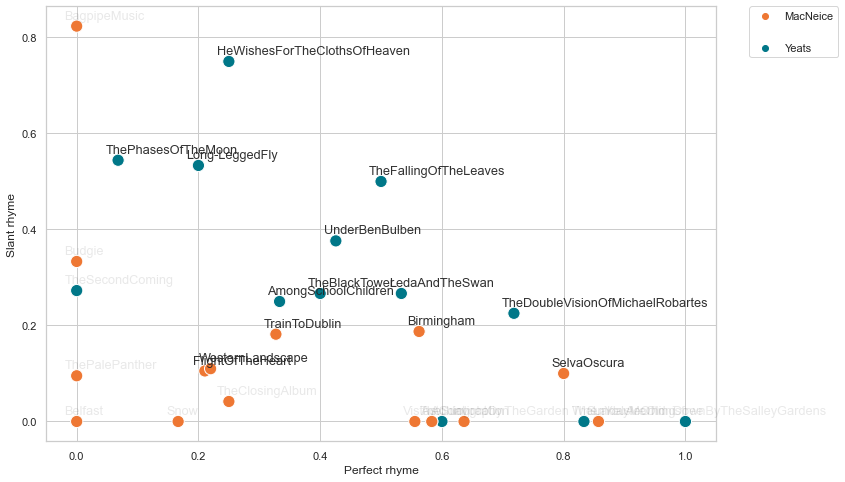

In [21]:
x_axis = 'perfect_rhyme_normalised'
y_axis = 'slant_rhyme_a_normalised'

import seaborn as sns
import matplotlib.pyplot as plt 

#colours = [  '#a88732' ,  '#265c28' , '#a0061a' ,  '#431670' ]

## The line below applies a stylesheet
## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 2})


fig = plt.figure( figsize = ( 12,8 ))

colours = ['#EE7733','#007788']
ax = sns.scatterplot(x = x_axis , y = y_axis , data=df , s=150 , hue = 'author' , palette = colours )

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


ax.set_xlabel('Perfect rhyme')
ax.set_ylabel('Slant rhyme') 

for index, row in df.iterrows():
    alpha = 0.95
    if row[x_axis] < 0.05 or row[y_axis] < 0.05:
        alpha = 0.1
    plt.text( row[x_axis]-0.02, row[y_axis]+ 0.015 , row['title'] , alpha = alpha , fontsize=12.8)

plt.show()

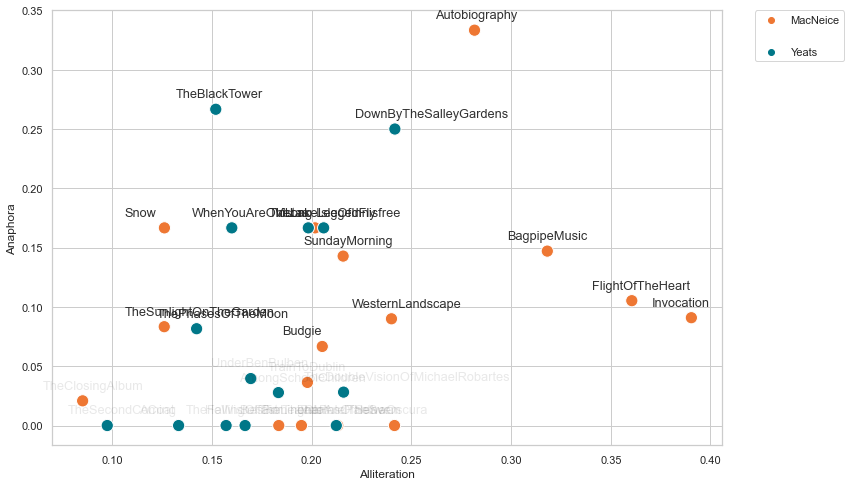

In [22]:
x_axis = 'alliteration_normalised'
y_axis = 'anaphora_normalised'

import seaborn as sns
import matplotlib.pyplot as plt 

#colours = [  '#a88732' ,  '#265c28' , '#a0061a' ,  '#431670' ]

## The line below applies a stylesheet
## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 2})


fig = plt.figure( figsize = ( 12,8 ))

colours = ['#EE7733','#007788']
ax = sns.scatterplot(x = x_axis , y = y_axis , data=df , s=150 , hue='author' , palette=colours)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel('Alliteration')
ax.set_ylabel('Anaphora') 

for index, row in df.iterrows():
    alpha = 0.95
    if row[x_axis] < 0.05 or row[y_axis] < 0.05:
        alpha = 0.1
    plt.text( row[x_axis]-0.02, row[y_axis]+ 0.01 , row['title'] , alpha = alpha , fontsize=12.8)

plt.show()

## Alliteration

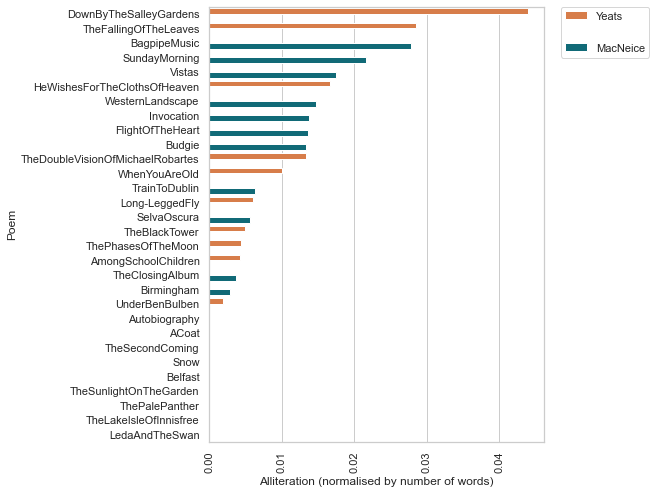

In [23]:
x_axis = 'internal_rhyme_normalised'
y_axis = 'title'


dfs = df.sort_values(by=[x_axis], ascending=False)

fig = plt.figure( figsize = ( 6,8 ))

colours = ['#EE7733','#007788']
ax = sns.barplot( data = dfs , x = x_axis , y= y_axis , color = '#22106b' , hue='author' , palette=colours)

ax.set_ylabel('Poem') 
ax.set_xlabel('Alliteration (normalised by number of words)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation= 90 )
plt.show()

## Perfect rhyme and slant rhyme

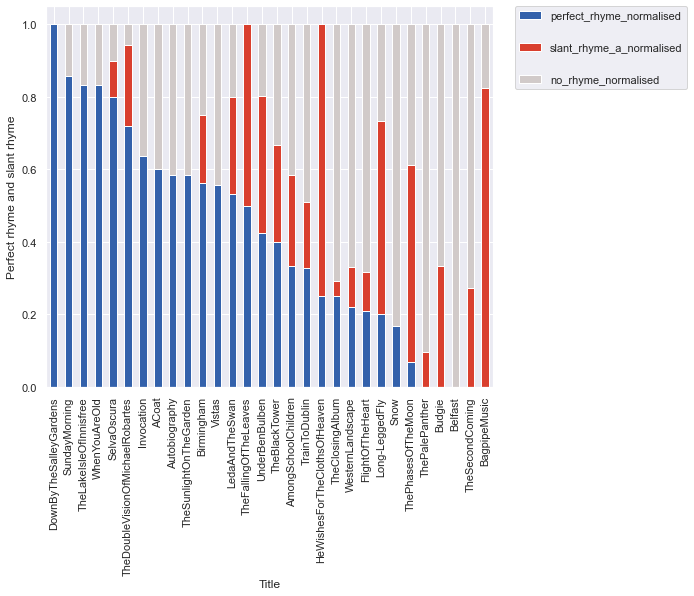

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

df_rhyme = df[ ['title' , 'perfect_rhyme_normalised' , 'slant_rhyme_a_normalised' , 'no_rhyme_normalised'  ] ]
df_rhyme = df_rhyme.sort_values(by=['perfect_rhyme_normalised'], ascending=False)

sns.set(rc={'figure.figsize':(8,7)})

#create stacked bar chart
ax = df_rhyme.set_index('title').plot(kind='bar', stacked=True, color=['#3361ab', '#d93f2e' , '#d1cac9'])

ax.set_xlabel('Title') 
ax.set_ylabel('Perfect rhyme and slant rhyme')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Similarity

In [25]:
columns = [ 'perfect_rhyme_normalised', 'slant_rhyme_a_normalised', 'anaphora_normalised',
       'alliteration_normalised', 'internal_rhyme_normalised', 'no_rhyme_normalised' ]
titles = df['title']
df_network = df[ columns ]

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

matrix = cosine_similarity(df_network)
matrix_df = pd.DataFrame( matrix , columns = titles , index = titles )

from pyvis.network import Network
net = Network(notebook=True , height="750px", width="100%" , bgcolor="#dce5f2" )

net.force_atlas_2based(
        gravity=-60,
        central_gravity=0.01,
        spring_length=100,
        spring_strength=0.08,
        damping=0.4,
        overlap= 0 )
               
related_texts = list(matrix_df.columns)

## an edge is drawn in between two nodes
# if the cosine similarity is 0.9 or higher
min_similarity = 0.95



for text,values in matrix_df.iterrows():
    for rt in related_texts:
        if text != rt:
            if values[rt] >= min_similarity:
                if author[f'{text}.xml'] == 'Yeats':
                    c ='#EE7733'
                else:
                    c = '#007788'  
                net.add_node(text , title=text ,  color= c , value = 15 )
                
                if author[f'{rt}.xml'] == 'Yeats':
                    c ='#EE7733'
                else:
                    c = '#007788'
                net.add_node(rt , title = rt, color = c , value = 15)
                
                net.add_edge( text , rt) 
                


net.show('network.html')

## Perfect rhyme and alliteration

In [27]:
poems = [ 'Autobiography.xml' , 'SelvaOscura.xml']

for tei in poems:
    path = os.path.join('XML',tei)
    poem = rp.Poem(path)
    print(poem.title + '\n')
    
#     for l in poem.transcriptions.values():
#         print(l)
    
    svg = poem.visualise_rhyme_alliteration()
    
    out = open( f'{poem.title}_svg.html' , 'w' , encoding = 'utf-8' )
    out.write(svg)
    out.close()

    from IPython.display import SVG, display, HTML
    display(HTML(svg))

Autobiography



SelvaOscura



## Sentiment analysis

In [28]:
import math

poems = ['TheBlackTower.xml', 'LedaAndTheSwan.xml' ]

for tei in poems:
    path = os.path.join('XML',tei)
    poem = rp.Poem(path)
    lines = poem.lines 


    colours_pos = ['#fecac9','#ffaaa9','#ff9a99','#ff9290','#ff6968','#ff3937','#ff0906','#e40200','#cc0200','#a30200']
    colours_neg = ['#a0cbf7','#3d96f0','#1782ed','#0e6ac5','#0e65bd','#0d61b6','#0c5dae','#0c59a7','#0b559f','#0b5197']

    from nltk import word_tokenize
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

    ana = SentimentIntensityAnalyzer()

    html = ''
    html += '<html><body>'
    html += f'<h2>{poem.title}</h2>'

    for line in lines:
        words = rp.word_tokenise(lines[line])

        for word in words:
            scores = ana.polarity_scores(word)
            if scores['neg'] > 0: 
                score = abs(round( scores['compound']*10))  
                colour = colours_neg[score-1]
                font = '#FFFFFF'
            elif scores['pos'] > 0: 
                score = abs(round( scores['compound']*10)) 
                colour = colours_pos[score-1]
                font = '#FFFFFF'
            else: 
                colour = '#FFFFFF'
                font = '#000000'


            if len(word)>1:
                html += ' '
            html += f'<span style="color: {font} ; background-color: {colour}">{word}</span>' 

        html += '<br/>'

    html += '</body></html>'

    from IPython.display import display, HTML
    display(HTML(html))


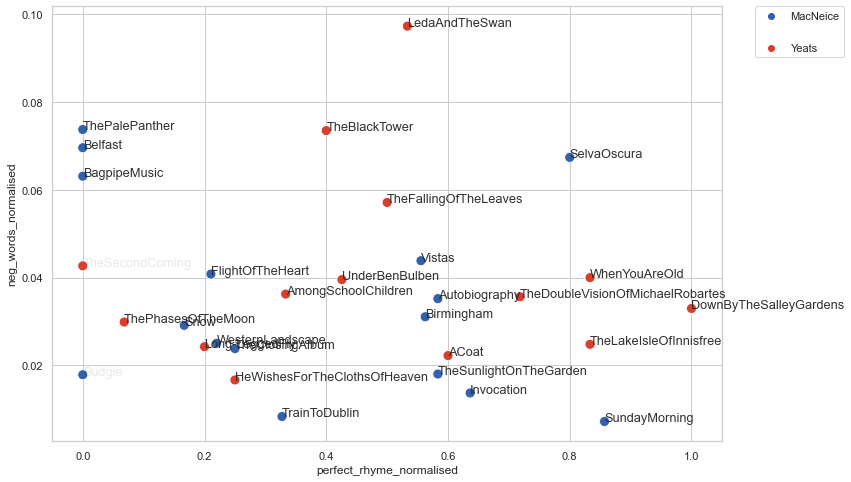

In [29]:
x_axis = 'perfect_rhyme_normalised'
df['neg_words_normalised'] = df['neg_words'] / df['nr_words']
y_axis = 'neg_words_normalised'


import seaborn as sns
import matplotlib.pyplot as plt 

#colours = [  '#a88732' ,  '#265c28' , '#a0061a' ,  '#431670' ]

## The line below applies a stylesheet
## and also adds spacing in between the lines of the legend 
sns.set(style='whitegrid', rc = {'legend.labelspacing': 2})


fig = plt.figure( figsize = ( 12,8 ))

colours = ['#3361ab', '#d93f2e']
ax = sns.scatterplot(x = x_axis , y = y_axis , data=df , s=100 , hue = 'author', palette=colours)

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


for index, row in df.iterrows():
    alpha = 0.95
    if row[x_axis] < 0.05 and row[y_axis] < 0.05:
        alpha = 0.1
    plt.text( row[x_axis], row[y_axis] , row['title'] , alpha = alpha , fontsize=12.8)

plt.show()